In [63]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [64]:
stardf = pd.read_csv("..//TG_stars.csv")
stardf.head (7)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,9.10,3.54,1.39,0.482,16.845016,3
1,9.27,21.90,3.10,0.999,20.972221,5
2,6.61,2.81,0.63,-0.019,13.853532,1
3,8.06,7.75,0.97,0.370,17.506509,3
4,8.55,2.87,1.11,0.902,15.839409,4
5,12.31,18.80,4.99,1.336,23.680789,6
6,9.64,17.74,1.30,0.740,20.884768,4


In [65]:
stars_df_features = stardf.copy()

stars_df_features['Amag_SQ'] = stars_df_features['Amag']**2
stars_df_features['Vmag_SQ'] = stars_df_features['Vmag']**2
stars_df_features['B-V_SQ'] = stars_df_features['B-V']**2
stars_df_features['Plx_SQ'] = stars_df_features['Plx']**2

stars_df_features.head()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,Amag_SQ,Vmag_SQ,B-V_SQ,Plx_SQ
0,9.10,3.54,1.39,0.482,16.845016,3,283.754574,82.8100,0.232324,12.5316
1,9.27,21.90,3.10,0.999,20.972221,5,439.834036,85.9329,0.998001,479.6100
2,6.61,2.81,0.63,-0.019,13.853532,1,191.920338,43.6921,0.000361,7.8961
3,8.06,7.75,0.97,0.370,17.506509,3,306.477840,64.9636,0.136900,60.0625
4,8.55,2.87,1.11,0.902,15.839409,4,250.886893,73.1025,0.813604,8.2369


In [66]:
stars_df_features.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         9677 non-null   float64
 1   Plx          9677 non-null   float64
 2   e_Plx        9677 non-null   float64
 3   B-V          9677 non-null   float64
 4   Amag         9677 non-null   float64
 5   TargetClass  9677 non-null   int64  
 6   Amag_SQ      9677 non-null   float64
 7   Vmag_SQ      9677 non-null   float64
 8   B-V_SQ       9677 non-null   float64
 9   Plx_SQ       9677 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 756.1 KB


In [67]:
X = stars_df_features.drop('TargetClass', axis=1, inplace=False)
Y = stars_df_features['TargetClass']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=21, stratify=Y)

In [68]:
Y_test.value_counts()

5    547
3    491
4    436
2    257
1    112
6     87
7      4
0      2
Name: TargetClass, dtype: int64

In [69]:
Y_test.count ()

1936

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
Y_train.value_counts()

5    2186
3    1966
4    1742
2    1028
1     447
6     346
7      18
0       8
Name: TargetClass, dtype: int64

In [72]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

In [73]:
rfc = RandomForestClassifier()

In [74]:
Y_train

321     4
3504    5
1325    1
2739    4
722     5
       ..
3388    1
6378    5
15      3
7896    4
8572    2
Name: TargetClass, Length: 7741, dtype: int64

In [75]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

#y_0 = np.ones(8)     
#y_1 = np.ones(477) + 1 
#y_2 = np.ones(1028) + 2 
#y_3 = np.ones(1966) + 3 
#y_4 = np.ones(1742) + 4 
#y_5 = np.ones(2186) + 5 
#y_6 = np.ones(346) + 6 
#y_7 = np.ones(18) + 7
#train_labels= np.concatenate([y_0,y_1, y_2,y_3,y_4,y_5,y_6,y_7])
#len(y)

#classes=[0,1,2,3,4,5,6,7]
#len(y)

In [76]:
#class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(train_labels), y= train_labels)
#class_weights

In [77]:
#wg={0:121.421875,1:2.03642558,2:0.94491732,3:0.49408698,4:0.55762055,5:0.44436185,6:2.8074422,7:53.96527778}

In [78]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf =RandomForestClassifier(n_estimators=200, max_features="log2", max_depth=10).fit(X_train_scaled, Y_train)

y_pred=clf.predict(X_test_scaled)

print(f'RFC Training Data : {clf.score(X_train_scaled,Y_train)}')
print(f'RFC Testing Data: {clf.score(X_test_scaled,Y_test)}')

RFC Training Data : 0.874564009817853
RFC Testing Data: 0.7778925619834711


In [ ]:
#RFC Training Data : 0.8759850148559618
#RFC Testing Data: 0.7758264462809917

#Tested it wasn't a fluke,
#RFC Training Data : 0.8758558325797701
#RFC Testing Data: 0.7753099173553719
#Achieved with a sample size of 0.2 
#n_estimators=200, max_features="log2", max_depth=10

#again test 
#RFC Training Data : 0.874564009817853
#RFC Testing Data: 0.7778925619834711

In [79]:
classifier = clf
classifier
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=200)

In [80]:
predictions = classifier.predict(X_test)
print(f"First 10 predictions:   {predictions[:10]}")
print(f"First 10 actual labels: {Y_test[:10].tolist()}")

First 10 predictions:   [3 2 2 2 4 2 5 3 5 2]
First 10 actual labels: [3, 3, 2, 1, 5, 1, 5, 3, 5, 2]


In [81]:
y_true = Y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[  0,   2,   0,   0,   0,   0,   0,   0],
       [  0,  56,  40,  10,   5,   0,   1,   0],
       [  0,  18, 214,  22,   3,   0,   0,   0],
       [  0,   2,  19, 424,  43,   3,   0,   0],
       [  0,   0,   1,  52, 290,  91,   2,   0],
       [  0,   0,   1,   2,  48, 472,  24,   0],
       [  0,   0,   0,   1,   1,  40,  44,   1],
       [  0,   0,   0,   0,   0,   3,   1,   0]], dtype=int64)

In [82]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.72      0.50      0.59       112
           2       0.78      0.83      0.80       257
           3       0.83      0.86      0.85       491
           4       0.74      0.67      0.70       436
           5       0.78      0.86      0.82       547
           6       0.61      0.51      0.55        87
           7       0.00      0.00      0.00         4

    accuracy                           0.77      1936
   macro avg       0.56      0.53      0.54      1936
weighted avg       0.77      0.77      0.77      1936



In [83]:
#the issue lies with group 0 and 7 because there isn't enough data in them. 
#group 0 and 7 has no scores at all, it won't even be considered, whilst they are VERY rare within the dataset, I need to find 
#a way to balance this. I tried to adjust class weight but it did not work. Probably didn't do it right, using the other class 
#weight options didn't help either. 

In [84]:
feature_importances = clf.feature_importances_

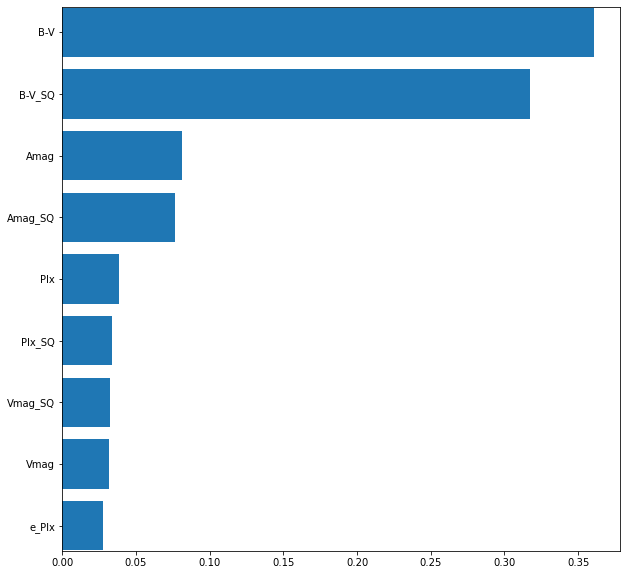

In [85]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [86]:
#RFC Training Data : 0.8699134478749515
#RFC Testing Data: 0.7742768595041323 #n_estimators=200, max_features="log2", max_depth=10
#RFC Training Data : 0.9711923524092495
#RFC Testing Data: 0.7608471074380165(n_estimators=200, max_features="log2", max_depth=15)


#increase sample size= 0.3
#RFC Training Data : 0.880702790491658
#RFC Testing Data: 0.7796143250688705 #n_estimators=200, max_features="log2", max_depth=10

In [87]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, Y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=10,
                                                 max_features='log2',
                                                 n_estimators=200))

In [88]:
X_selected_train, X_selected_test, Y_train, Y_test = train_test_split(sel.transform(X), Y)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [89]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, Y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, Y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, Y_test)}')

Training Score: 0.73845941849249
Testing Score: 0.7367768595041322


In [ ]:
# does not improve score stick with RFC like it did before, this is fine. It's not a regression model anyway 

In [ ]:
#non linear models need more data to pull from this is why increasing the test size works so well, but how to I go about
#upsamping without creating bias? Nothing changes when I use the larger data set so that isn't the issue, it's the distribution. 


# Below code was used to find ideal parameters

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# Build a classification task using 3 informative features
X, Y = make_classification(n_samples=1936,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1,3,5,7,10],    
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, Y)
print (CV_rfc.best_params_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:

#RFC Training Data : 0.8699134478749515
#RFC Testing Data: 0.7742768595041323 #n_estimators=200, max_features="log2", max_depth=10
#RFC Training Data : 0.9711923524092495
#RFC Testing Data: 0.7608471074380165(n_estimators=200, max_features="log2", max_depth=15)
#RFC Training Data : 0.8697842655987599
#RFC Testing Data: 0.7706611570247934 (n_estimators=200, max_features="auto", max_depth=10)